In [1]:
# %load ../uoicorr_imports.py
%load_ext autoreload
%autoreload 2

import h5py

import numpy as np
import matplotlib.pyplot as plt

import sys, os, pdb
import socket
# Hack to import pyuoi
parent_path, current_dir = os.path.split(os.path.abspath('.'))
while current_dir not in ['nse']:
	parent_path, current_dir = os.path.split(parent_path)
p = os.path.join(parent_path, current_dir)

# And standard list of subdirectories
if '%s\\pyuoi' % p not in sys.path:
    sys.path.append('%s/pyoui' % p)
    sys.path.append('%s/pyuoi/pyuoi' % p)

from linear_model.lasso import UoI_Lasso
from linear_model.elasticnet import UoI_ElasticNet

if '%s/uoicorr' % p not in sys.path:
    sys.path.append('%s/uoicorr' % p)

from postprocess import postprocess_file, postprocess_dir

In [2]:
data = postprocess_dir('/home/Ankit/nse/uoicorr/data/01202019b')

(0, 0)


(210, 21)

(array([58., 53., 42., 36., 30., 40., 19., 21., 22., 12., 20., 14., 15.,
        14., 10.,  6., 15., 11.,  8.,  5.,  4.,  3.,  3.,  7.,  2.,  1.,
         5.,  2.,  2.,  4.,  1.,  0.,  1.,  0.,  1.,  2.,  1.,  0.,  5.,
         2.,  1.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  1.,  0.,  1.,  1.,  1.,  3.,  0.,  2.,  4.,  2.,  1.,  0.,
         2.,  1.,  1.,  2.,  2.,  0.,  4.,  4.,  4.,  2.,  4.,  3.,  2.,
         7.,  7.,  6.,  9.,  8.,  7., 13., 14., 15., 13., 19., 18., 17.,
        24., 26., 32., 25., 29., 31., 41., 35., 55.]),
 array([-5.00000000e+00, -4.90001000e+00, -4.80002000e+00, -4.70003000e+00,
        -4.60004000e+00, -4.50005001e+00, -4.40006001e+00, -4.30007001e+00,
        -4.20008001e+00, -4.10009001e+00, -4.00010001e+00, -3.90011001e+00,
        -3.80012001e+00, -3.70013001e+00, -3.60014001e+00, -3.50015002e+00,
        -3.40016002e+00, -3.30017002e+00, -3.20018002e+00, -3.10019002e+00,
        -3.00020002e+00, -2.90021002e+00, -2.80022002e

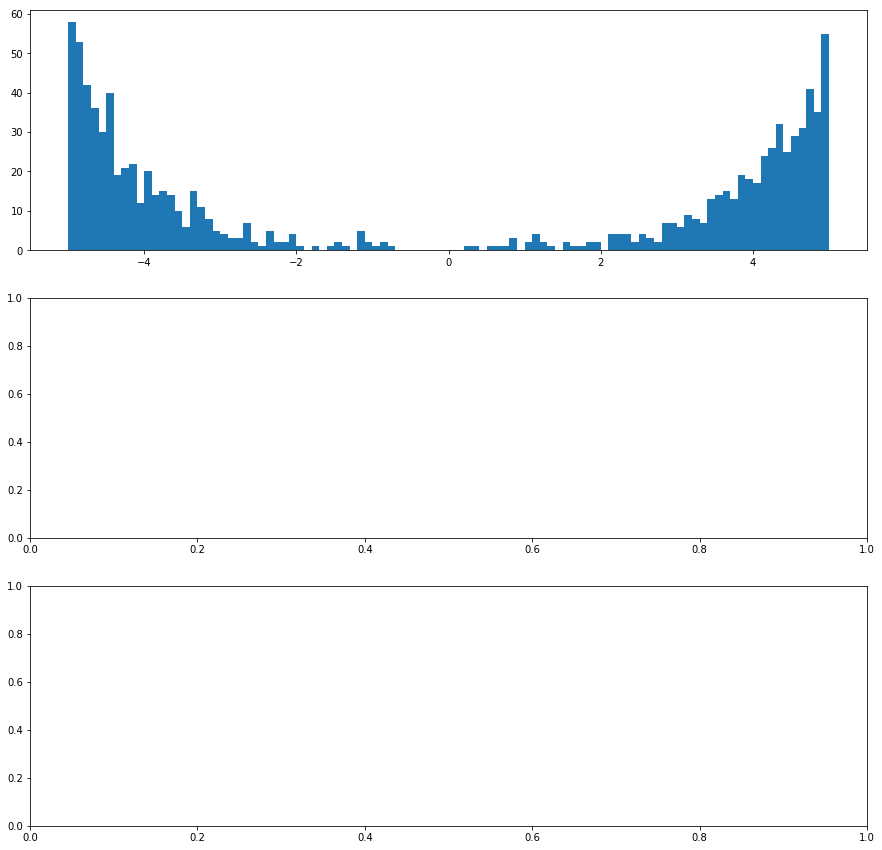

In [15]:
# Plot prediction accuracy, selection accuracy, estimation error

# Need to understand estimation error and run more simulations for estimation variability 
fig, ax = plt.subplots(3, 1, figsize = (15, 15))

full = data.loc[data['sparsity'] == 1].iloc[0]
ax[0].hist(full.betas.ravel(), bins = 100)

#  Prediction accuracy (R^2)
